##PLANTS SEEDLING CLASSIFICATION

##Objective:
The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

##Data Description:
* The goal of the project is to create a classifier capable of determining a plant's species from an image.

##List of Plant species

* Black-grass
* Charlock
* Cleavers
* Common Chickweed
* Common Wheat
* Fat Hen
* Loose Silky-bent
* Maize
* Scentless Mayweed
* Shepherds Purse
* Small-flowered Cranesbill
* Sugar beet

**INSTALL AND IMPORT NECESSARY LIBRARIES**

In [ ]:
!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the image file of the dataset
images = np.load('images.npy')

#Load the labels file of the dataset
labels = pd.read_csv('Labels.csv')

##Overview of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 BGR images of shape 128 x 128 x 3 -- each having 3 channels.

##Plotting images using OpenCV and matplotlib

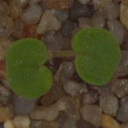

In [ ]:
cv2_imshow(images[85])

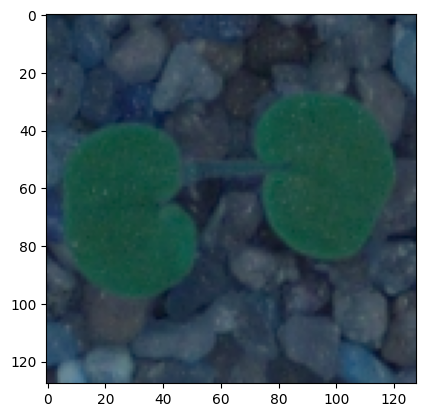

In [ ]:
plt.imshow(images[85])

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

##Exploratory Data Analysis

In [ ]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

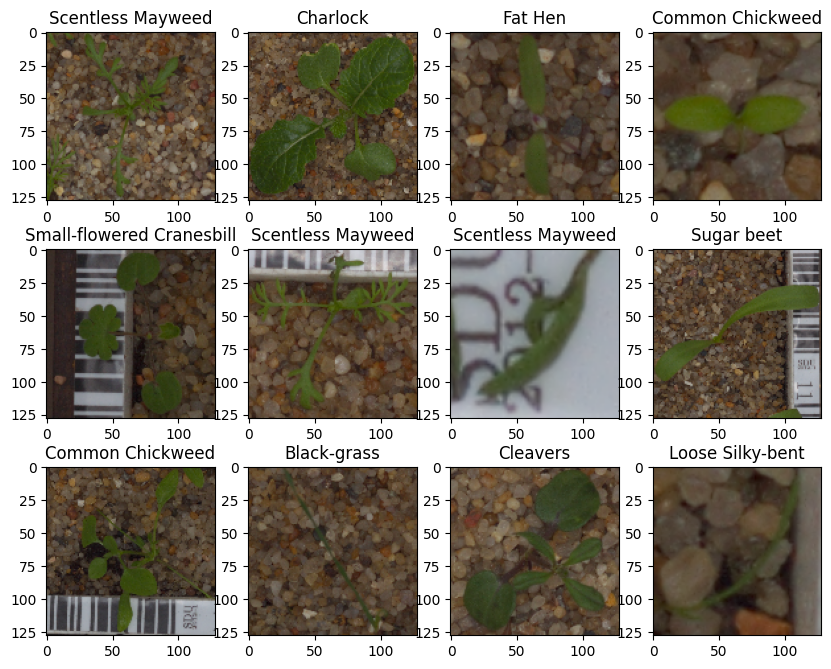

In [ ]:
plot_images(images, labels)

Some interesting features of variation in the plants are the width of the petals, the length, the number of petals on a single vine, the overall shape resemblance to known geometric shapes, etc.  

###Check for data imbalance

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

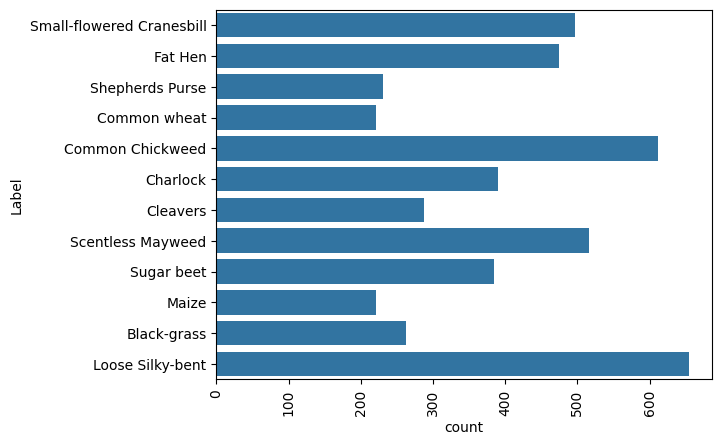

In [ ]:
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

###We have evidence of class imbalance in this dataset -- to treat this, we can increase the weights of the minority classes -- we will code address this in the "Data Prep for Modeling" section.

#Data Pre-Processing

###Convert the BGR images to RGB images.

In [ ]:
import cv2
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

###Resize the images

In [ ]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

###Image before resizing

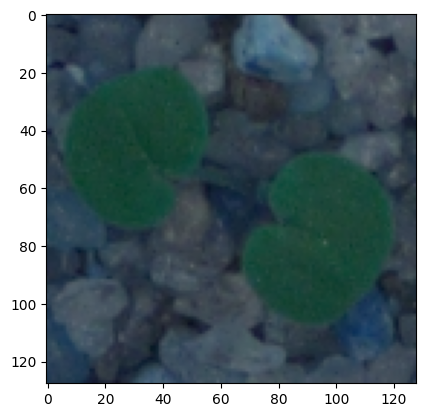

In [ ]:
plt.imshow(images[9])

###Images after resizing

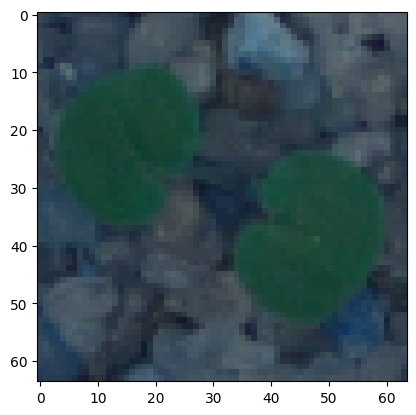

In [ ]:
plt.imshow(images_decreased[9])

##Data prep for Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


In [ ]:
#Increase weights for minority classes
from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 0.7974709784411277,
 1: 0.8348524305555556,
 2: 1.714349376114082,
 3: 1.7909683426443204,
 4: 0.6476430976430977,
 5: 1.0145042194092826,
 6: 1.3818247126436782,
 7: 0.7669457735247209,
 8: 1.0275106837606838,
 9: 1.7909683426443204,
 10: 1.5050860719874803,
 11: 0.604874213836478}

###Encode the target labels

In [ ]:
# Convert labels from names to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(3847, 12)
(428, 12)
(475, 12)


###Data Normalization

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

##Model Building

In [ ]:
# Importing the Keras backend
from tensorflow import keras
# Clearing backend
keras.backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random # Importing the random module
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

##Fitting the model on train data

In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons
# and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [ ]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
            class_weight = class_weights
)

Epoch 1/30
121/121 - 34s - loss: 2.8314 - accuracy: 0.1536 - val_loss: 2.3013 - val_accuracy: 0.2407 - 34s/epoch - 281ms/step
Epoch 2/30
121/121 - 31s - loss: 2.3856 - accuracy: 0.2675 - val_loss: 1.9715 - val_accuracy: 0.3481 - 31s/epoch - 257ms/step
Epoch 3/30
121/121 - 31s - loss: 2.1634 - accuracy: 0.2943 - val_loss: 1.8276 - val_accuracy: 0.3668 - 31s/epoch - 253ms/step
Epoch 4/30
121/121 - 30s - loss: 2.0595 - accuracy: 0.3200 - val_loss: 1.7694 - val_accuracy: 0.4019 - 30s/epoch - 251ms/step
Epoch 5/30
121/121 - 30s - loss: 1.9811 - accuracy: 0.3416 - val_loss: 1.6956 - val_accuracy: 0.4439 - 30s/epoch - 250ms/step
Epoch 6/30
121/121 - 30s - loss: 1.9696 - accuracy: 0.3501 - val_loss: 1.6744 - val_accuracy: 0.4322 - 30s/epoch - 251ms/step
Epoch 7/30
121/121 - 30s - loss: 1.9000 - accuracy: 0.3613 - val_loss: 1.6206 - val_accuracy: 0.4790 - 30s/epoch - 252ms/step
Epoch 8/30
121/121 - 30s - loss: 1.8492 - accuracy: 0.3837 - val_loss: 1.5591 - val_accuracy: 0.4813 - 30s/epoch - 252

###Model Evaluation

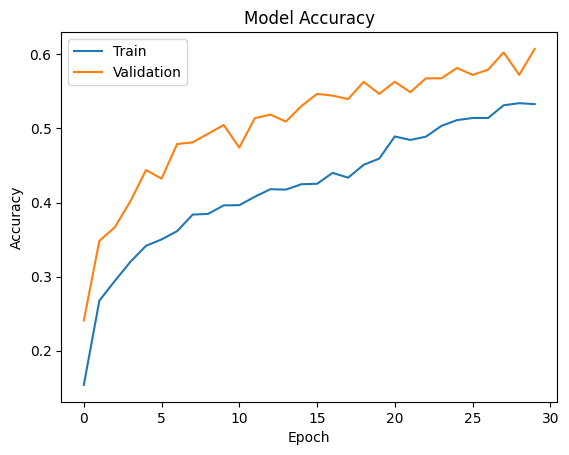

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



*   This is indicative of a bad/incorrect or unknown fit. This model needs revision and should not be considered an adequate model as the model predicts better on unseen data rather than seen data. This could be a function of dropout value or other factors which may effect the bias of the model perhaps. We move on to revising this model.




##Evaluate the model on test data

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2) ; accuracy

15/15 - 1s - loss: 1.2605 - accuracy: 0.5768 - 858ms/epoch - 57ms/step


[1.260477066040039, 0.5768421292304993]

##Generating the prediction using test data

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)


15/15 [==============================] - 1s 65ms/step


##Plotting the Confusion Matrix

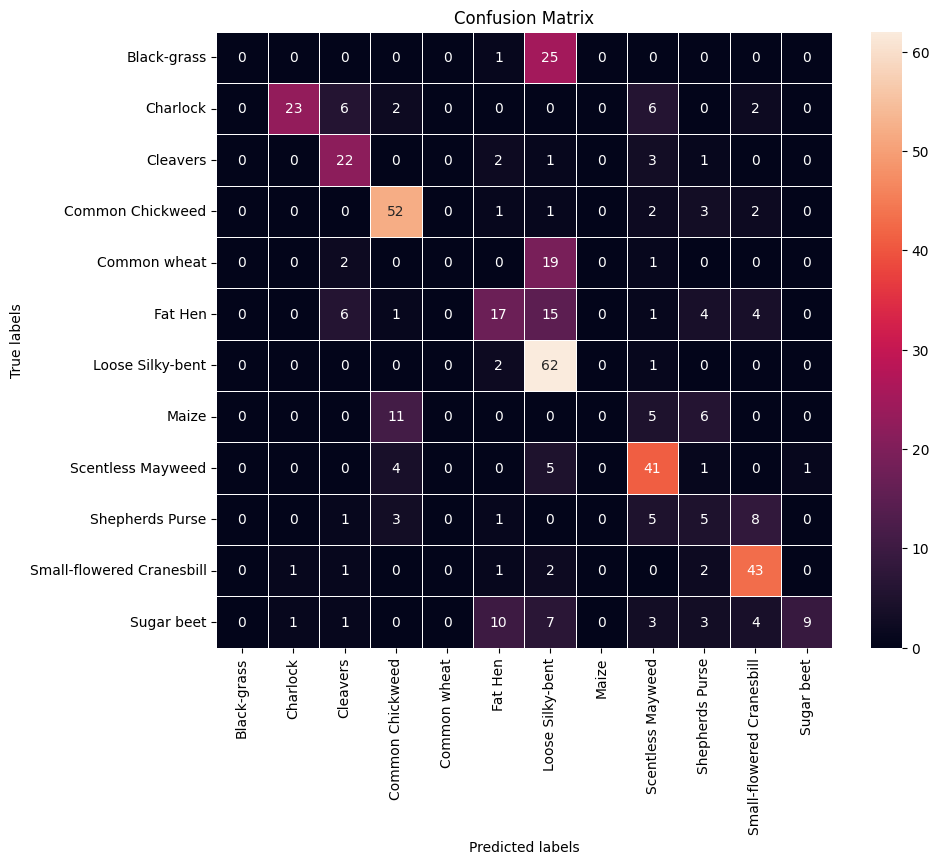

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
plt.show()

**Observations**

* The model made 100% misclassification of the Black-grass & Common Wheat seedlings. This reflects the odd fit of the model where the validation accuracy was greater than the training data accuracy.

###Plot the Classification Report

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_pred_arg, y_test_arg) ; print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.59      0.92      0.72        25
           2       0.76      0.56      0.65        39
           3       0.85      0.71      0.78        73
           4       0.00      0.00      0.00         0
           5       0.35      0.49      0.41        35
           6       0.95      0.45      0.61       137
           7       0.00      0.00      0.00         0
           8       0.79      0.60      0.68        68
           9       0.22      0.20      0.21        25
          10       0.86      0.68      0.76        63
          11       0.24      0.90      0.38        10

    accuracy                           0.58       475
   macro avg       0.47      0.46      0.43       475
weighted avg       0.77      0.58      0.64       475



#Model 2
Our model have overfitting problems. We will address this via data augmentation and Batch Normalization to assess any model performance from this.

##Data Augmentation

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/30
60/60 [==============================] - 37s 620ms/step - loss: 0.6694 - accuracy: 0.7618 - val_loss: 1.3305 - val_accuracy: 0.6308
Epoch 2/30
60/60 [==============================] - 39s 642ms/step - loss: 0.6254 - accuracy: 0.7748 - val_loss: 0.9334 - val_accuracy: 0.7593
Epoch 3/30
60/60 [==============================] - 39s 643ms/step - loss: 0.6378 - accuracy: 0.7661 - val_loss: 0.8953 - val_accuracy: 0.7593
Epoch 4/30
60/60 [==============================] - 38s 635ms/step - loss: 0.6195 - accuracy: 0.7695 - val_loss: 1.0321 - val_accuracy: 0.7103
Epoch 5/30
60/60 [==============================] - 36s 604ms/step - loss: 0.6256 - accuracy: 0.7706 - val_loss: 0.7271 - val_accuracy: 0.8037
Epoch 6/30
60/60 [==============================] - 37s 609ms/step - loss: 0.6236 - accuracy: 0.7724 - val_loss: 0.7395 - val_accuracy: 0.7897
Epoch 7/30
60/60 [==============================] - 37s 617ms/step - loss: 0.5827 - accuracy: 0.7914 - val_loss: 0.7487 - val_accuracy: 0.7967

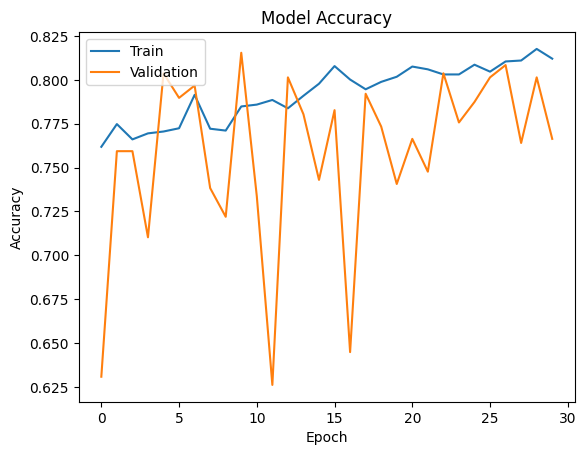

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The model is improved here and doesn't indicate any strong systemic issues in terms of accuracy of seen vs. unseen as the Base CNN model. Data Augmentation has drastically improved model accuracy.

##Evaluate the model on test data

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2) ; print(accuracy)

15/15 - 1s - loss: 1.0116 - accuracy: 0.7811 - 909ms/epoch - 61ms/step
[1.0116420984268188, 0.7810526490211487]


We see that accuracy has improved relative to our previous model without Data Augmentation

##Plot the confusion matrix

In [ ]:
#Obtain the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 1s 76ms/step


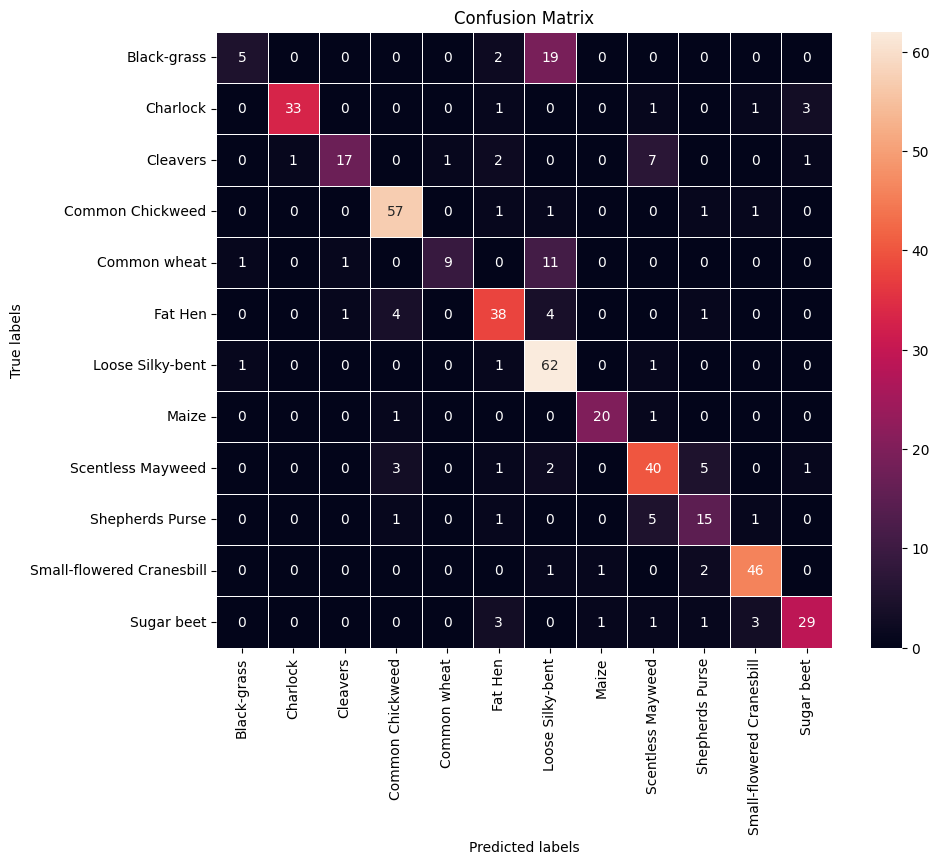

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation = 0)
plt.show()

**Observations**

* This model improves considerably in classifying Common Wheat, however still struggles in classifying Black-grass, though there is a marginal improvement though likely not statistically so relative to Base CNN.

##Plot the classification report

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_pred_arg, y_test_arg) ; print(cr)

              precision    recall  f1-score   support

           0       0.19      0.71      0.30         7
           1       0.85      0.97      0.90        34
           2       0.59      0.89      0.71        19
           3       0.93      0.86      0.90        66
           4       0.41      0.90      0.56        10
           5       0.79      0.76      0.78        50
           6       0.95      0.62      0.75       100
           7       0.91      0.91      0.91        22
           8       0.77      0.71      0.74        56
           9       0.65      0.60      0.63        25
          10       0.92      0.88      0.90        52
          11       0.76      0.85      0.81        34

    accuracy                           0.78       475
   macro avg       0.73      0.81      0.74       475
weighted avg       0.83      0.78      0.79       475



##Transfer Learning using VGG16

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
Total params: 14780988 (56.38 MB)
Trainable params: 66

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1, class_weight = class_weights)

Epoch 1/30
60/60 [==============================] - 194s 3s/step - loss: 2.7843 - accuracy: 0.1634 - val_loss: 2.2895 - val_accuracy: 0.2757
Epoch 2/30
60/60 [==============================] - 189s 3s/step - loss: 2.5134 - accuracy: 0.2522 - val_loss: 2.1344 - val_accuracy: 0.2734
Epoch 3/30
60/60 [==============================] - 190s 3s/step - loss: 2.3514 - accuracy: 0.2865 - val_loss: 2.0305 - val_accuracy: 0.2991
Epoch 4/30
60/60 [==============================] - 196s 3s/step - loss: 2.2422 - accuracy: 0.2990 - val_loss: 1.9530 - val_accuracy: 0.3014
Epoch 5/30
60/60 [==============================] - 190s 3s/step - loss: 2.1225 - accuracy: 0.3273 - val_loss: 1.8534 - val_accuracy: 0.3621
Epoch 6/30
60/60 [==============================] - 192s 3s/step - loss: 2.0420 - accuracy: 0.3534 - val_loss: 1.7857 - val_accuracy: 0.3902
Epoch 7/30
60/60 [==============================] - 212s 4s/step - loss: 1.9466 - accuracy: 0.3677 - val_loss: 1.7082 - val_accuracy: 0.4206
Epoch 8/30
60

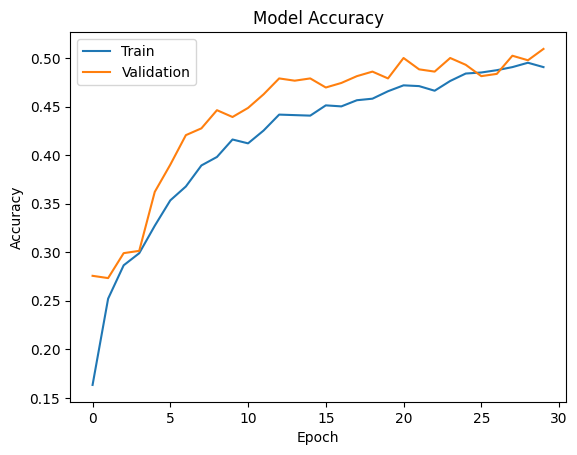

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations**

* The model performs analogous to Base CNN model.

##Evaluate the model on test data

In [ ]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2) ; accuracy

15/15 - 20s - loss: 1.3683 - accuracy: 0.5326 - 20s/epoch - 1s/step


[1.3683366775512695, 0.5326315760612488]

In [ ]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 21s 1s/step


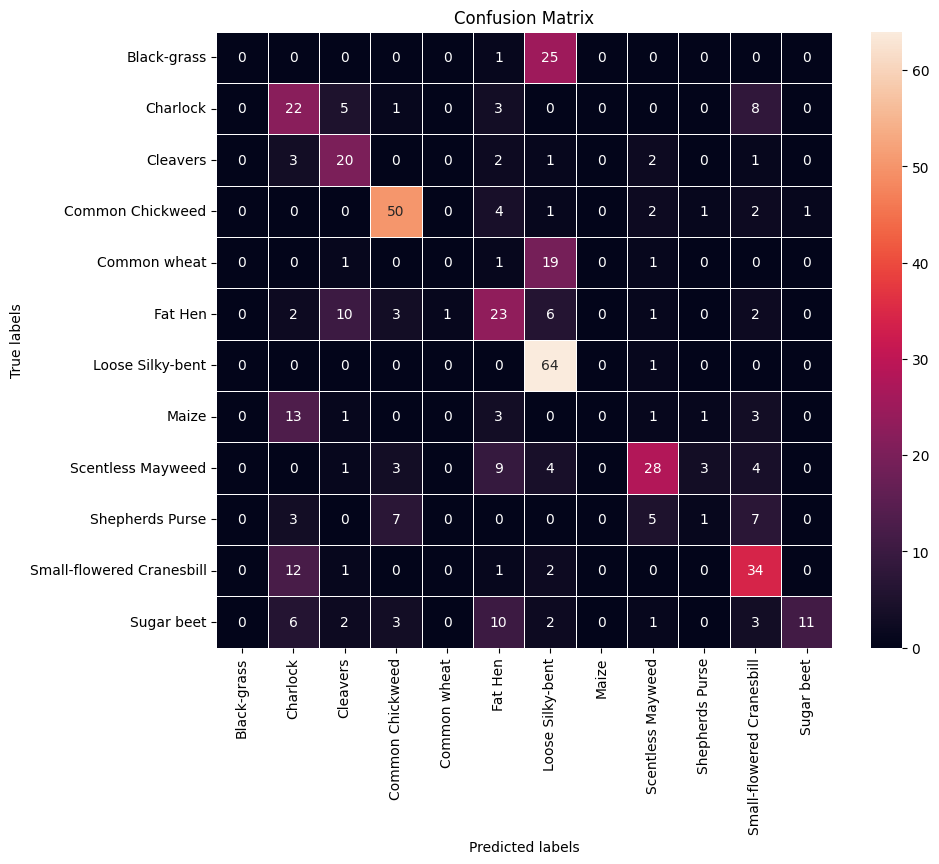

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation = 0)
plt.show()

**Observations**

* The model performs approx. the same as the base CNN and struggles, mightly, in classifying the Black-grass seedling in particular.

##Plot the classification Report

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_pred_arg, y_test_arg) ; print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.56      0.36      0.44        61
           2       0.69      0.49      0.57        41
           3       0.82      0.75      0.78        67
           4       0.00      0.00      0.00         1
           5       0.48      0.40      0.44        57
           6       0.98      0.52      0.68       124
           7       0.00      0.00      0.00         0
           8       0.54      0.67      0.60        42
           9       0.04      0.17      0.07         6
          10       0.68      0.53      0.60        64
          11       0.29      0.92      0.44        12

    accuracy                           0.53       475
   macro avg       0.42      0.40      0.38       475
weighted avg       0.71      0.53      0.59       475



#Final Model Selection: MODEL 2

##Visualizing the prediction:

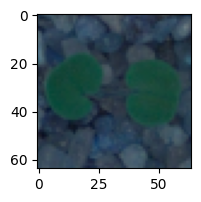

1/1 [==============================] - 0s 54ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


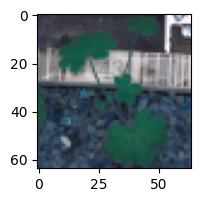

1/1 [==============================] - 0s 38ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


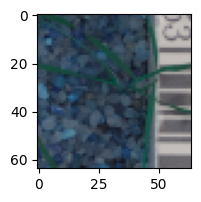

1/1 [==============================] - 0s 50ms/step
Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[43])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[43].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[43])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[89])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[89].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[89])                                              # using inverse_transform() to get the output label from the output vector

#Conclusion

In [ ]:
Performance_Metrics = pd.DataFrame({'Models': ['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'], 'Test Accuracy': ['57.68%', '74.11%', '53.26%']})
Performance_Metrics

,Models,Test Accuracy
0,Base CNN Model,57.68%
1,CNN Model with Data Augmentation,74.11%
2,Transfer Learning Model,53.26%


* From the above metrics, we choose the CNN Model with Data Augmentation. This model performed best on the test data with 74.11% accuracy.
* Statistically, the test accuracy rate does not differ between a base CNN model and the transfer learning model -- however, the CNN Model with Data Augmentation statstically bests the two other models in accuracy.
* These models can be improved as I varied dropout rate which produced variation in the test accuracy metrics.
* Different filter sizes and different filters can possibly also improve metrics.
* Other transfer learning architectures can be assessed as well.
* The chosen model likely isn't ready for deployment as it's necessary to assess the consequences of having an error rate statistically between 22% & 30%. Fundamentally, the model likely can be improved.
* All models struggled with the Black-grass seedling classification. We can gain insight as to why by seeing its picture at the beginning and seeing it's even hard for the human eye to discern it. Model accuracy can likely improve by obtaining better pictures of that particular seedling that makes the plant easier for models to see.